In [77]:
# importing all the necessary library

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [78]:
dataset=pd.read_csv("output_xalancbmk_r_with200.csv") #importing the CSV file
dataset=dataset.iloc[300:]  #cropping some starting row of CSV 

In [79]:
dataset.head() #displaying first 5 row of CSV

,index,time,cache-misses:u,dTLB-store-misses,branch-misses:u,iTLB-load-misses,LLC-load-misses,L1-icache-load-misses,L1-dcache-load-misses,branch-load-misses,cpu-cycles:u,instructions:u,dTLB-load-misses,LLC-store-misses,cpi
300,300,60.267669,5558870,5412,533582,21264,5600731,162886,10205276,512994,395286642,243590231,903047,6672,1.622752
301,301,60.467945,5659968,4495,554714,21457,5580831,170923,10193911,619036,423837783,254120631,797924,5372,1.667861
302,302,60.668140,5769528,5155,600765,18375,5817420,147935,11136782,598399,437337474,256739421,805125,4470,1.703429
303,303,60.868377,5673318,4946,621129,20660,5778293,158615,10914385,571882,395618748,252083171,855602,6688,1.569398
304,304,61.068589,5465797,4829,541217,18658,5521659,170195,10853760,529324,390086349,245330731,826167,5849,1.590043


In [80]:
dataset.describe() #discrbing sount,mean,max,min etc. values for all the columns

,index,time,cache-misses:u,dTLB-store-misses,branch-misses:u,iTLB-load-misses,LLC-load-misses,L1-icache-load-misses,L1-dcache-load-misses,branch-load-misses,cpu-cycles:u,instructions:u,dTLB-load-misses,LLC-store-misses,cpi
count,2220.00000,2220.000000,2.220000e+03,2220.000000,2.220000e+03,2220.000000,2.220000e+03,2.220000e+03,2.220000e+03,2.220000e+03,2.220000e+03,2.220000e+03,2.220000e+03,2220.000000,2220.000000
mean,1409.50000,282.412050,9.781550e+05,31944.788288,4.847225e+05,20011.731532,7.407783e+05,5.055858e+05,3.061813e+07,4.859680e+05,5.011542e+08,5.359071e+08,3.211827e+06,223298.607207,1.036727
std,641.00312,128.336741,1.514835e+06,13801.506965,2.079930e+05,6442.783101,1.593903e+06,2.125887e+05,7.149879e+06,2.148256e+05,3.349424e+07,2.124893e+08,1.213742e+06,135235.749708,0.290967
min,300.00000,60.267669,2.530600e+04,0.000000,2.557600e+04,0.000000,1.980900e+04,7.710000e+02,4.224108e+06,2.524800e+04,2.840427e+08,1.750347e+08,8.000000e+02,0.000000,0.304965
25%,854.75000,171.345225,3.743532e+05,30659.750000,4.475095e+05,17058.750000,1.312345e+05,4.389450e+05,3.082907e+07,4.434360e+05,5.101871e+08,4.504816e+08,3.342082e+06,137769.750000,0.902922
50%,1409.50000,282.414179,4.506100e+05,35918.000000,4.770065e+05,20357.000000,1.649945e+05,5.414650e+05,3.169700e+07,4.771620e+05,5.126771e+08,5.028372e+08,3.707202e+06,223245.000000,1.018206
75%,1964.25000,393.477682,5.477692e+05,39386.000000,5.072468e+05,23726.250000,2.166130e+05,6.192772e+05,3.377324e+07,5.104985e+05,5.138065e+08,5.661272e+08,3.925822e+06,312101.250000,1.133072
max,2519.00000,504.522317,6.121102e+06,283670.000000,2.967934e+06,68579.000000,6.130258e+06,3.504045e+06,4.923892e+07,2.991040e+06,5.185753e+08,1.653371e+09,4.479394e+06,793586.000000,2.160961


In [81]:
instructions = dataset['instructions:u'].values.reshape(-1,1) #extracting values of column instructions

y=dataset['cpi']  #setting y as CPI

X = dataset.drop(['cpi','cpu-cycles:u','index','time','instructions:u','cache-misses:u'], axis = 1) #dropping all the other column which is not required
X = np.divide(X, instructions)  #dividing each columns value with instruction count (so all values are between 0 and 1)

In [82]:
from sklearn.model_selection import train_test_split  # performing train test split so that we can train our model on training data and test the model on testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0) #specifying how much should be train test split
print(X_train.shape)
print(X_test.shape)

(1998, 9)
(222, 9)


In [83]:
from sklearn.linear_model import Lasso  # used Lasso model for prediction becuase our aim is to get non-negative co-efficient
regressor = Lasso(alpha=0.00000000001,positive=True,max_iter=1000000) #setting parameter for Lasso difining alpha and setting how much max iter should be

temp=regressor.fit(X_train,y_train)  

coeff_df = pd.DataFrame(temp.coef_, X_train.columns, columns=['Cofficient']) # getting coefficient value with the name of column for which co-efficient is generated
print(coeff_df)
print()

print('Linear Intercept term: ',temp.intercept_) # obtaining intercept term

y_pred = regressor.predict(X_test)  # predicting the value of y(i.e. CPI) for testing data so that we can check how accurate our model is

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
print()
rmse = sqrt(mean_squared_error(y_test, y_pred))  # Computing value of Root Mean Square Error for testing data
print("RMSE:- ",rmse)

rsq = r2_score(y_test,y_pred) # Computing R-Squared for testing data
print('R-square: ',rsq)

rad=1-(((1-rsq)*(len(y)-1))/(len(y)-1-X.shape[1])) # Computing Adjusted R-Squared for testing data
print('Adjusted R-square: ', rad)

F=(rsq/(1-rsq))*((len(y)-1-X.shape[1])/X.shape[1]) # Computing F-value for testing data
print('F value :',F)

print("Pvalues :",ttest_ind(X, y).pvalue) # Finding p-value

res=y_test-y_pred  # Getting vale of all the residuals
print('Sum of Residuals :', sum(res))


                        Cofficient
dTLB-store-misses        95.455093
branch-misses:u           7.880954
iTLB-load-misses       1817.424571
LLC-load-misses          39.952313
L1-icache-load-misses    78.432189
L1-dcache-load-misses     4.390313
branch-load-misses       15.981623
dTLB-load-misses         43.539763
LLC-store-misses         81.756238

Linear Intercept term:  0.1641469411019283

RMSE:-  0.029112512675629757
R-square:  0.9905752049528812
Adjusted R-square:  0.9905368234345898
F value : 25808.650857200664
Pvalues : [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sum of Residuals : 0.32830590816465366


In [84]:
mean_instruction = dataset['instructions:u'].values.mean()  # Computing mean of total instruction
mean_cpi = dataset['cpi'].values.mean() # Computing mean of CPI 

#Extracting values of all the co-efficient for calculation and storing them in specific variable
C1=temp.coef_[0]
C2=temp.coef_[1]
C3=temp.coef_[2]
C4=temp.coef_[3]
C5=temp.coef_[4]
C6=temp.coef_[5]
C7=temp.coef_[6]
C8=temp.coef_[7]
C9=temp.coef_[8]

# getting name in coefficient array so that we can check which value is for which array
index = coeff_df.index
a_list = list(index)

# Computing CPI for all the miss event for developing the CPI stack
mean_C1 = dataset[a_list[0]].values.mean()  # in order to get the CPI  obtained mean of count of specific column
cpi_of_c1=C1*(mean_C1/mean_instruction) # For getting value between 0 and 1 we have divided each column with count of inst so here again we are dividing with count of instructions
print(a_list[0],cpi_of_c1)  # printing the name of miss event and value of CPI corresponding to the miss event

# same above three steps are continued for all the events
mean_C2 = dataset[a_list[1]].values.mean()
cpi_of_c2=C2*(mean_C2/mean_instruction)
print(a_list[1],cpi_of_c2)

mean_C3 = dataset[a_list[2]].values.mean()
cpi_of_c3=C3*(mean_C3/mean_instruction)
print(a_list[2],cpi_of_c3)

mean_C4 = dataset[a_list[3]].values.mean()
cpi_of_c4=C4*(mean_C4/mean_instruction)
print(a_list[3],cpi_of_c4)

mean_C5 = dataset[a_list[4]].values.mean()
cpi_of_c5=C5*(mean_C5/mean_instruction)
print(a_list[4],cpi_of_c5)

mean_C6 = dataset[a_list[5]].values.mean()
cpi_of_c6=C6*(mean_C6/mean_instruction)
print(a_list[5],cpi_of_c6)

mean_C7 = dataset[a_list[6]].values.mean()
cpi_of_c7=C7*(mean_C7/mean_instruction)
print(a_list[6],cpi_of_c7)

mean_C8 = dataset[a_list[7]].values.mean()
cpi_of_c8=C8*(mean_C8/mean_instruction)
print(a_list[7],cpi_of_c8)

mean_C9 = dataset[a_list[8]].values.mean()
cpi_of_c9=C9*(mean_C9/mean_instruction)
print(a_list[8],cpi_of_c9)



Base_cpi=temp.intercept_  # intercept will give the value of base CPI and for building the stack we will need base CPI
print('Base CPI is--            ',Base_cpi)

misses_cpi=cpi_of_c1+cpi_of_c2+cpi_of_c3+cpi_of_c4+cpi_of_c5+cpi_of_c6+cpi_of_c7+cpi_of_c8+cpi_of_c9 # Finding CPI contribution due to all the misses
print('Misses CPI is--            ',misses_cpi)

print('CPI we got is--            ',Base_cpi+misses_cpi) # what is the average CPI we got by our calculation

print('Average CPI is--            ',mean_cpi) # what is the actual average CPI for the benchmark

dTLB-store-misses 0.0056899646837726085
branch-misses:u 0.007128242571908352
iTLB-load-misses 0.0678658843355683
LLC-load-misses 0.05522562104702577
L1-icache-load-misses 0.07399453509139903
L1-dcache-load-misses 0.2508329491759226
branch-load-misses 0.0144923558358188
dTLB-load-misses 0.2609448269730745
LLC-store-misses 0.034065703622160805
Base CPI is--             0.1641469411019283
Misses CPI is--             0.7702400833366507
CPI we got is--             0.934387024438579
Average CPI is--             1.0367271218489305


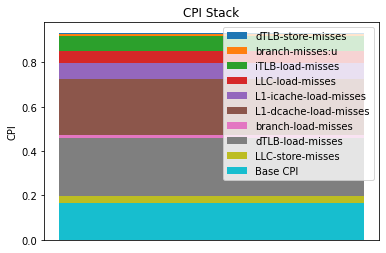

In [85]:
#creating the array of all the values of CPI of all the miss event so that we can directly get value byindexing also appended base CPI
array_of_cpi=[cpi_of_c1,cpi_of_c2,cpi_of_c3,cpi_of_c4,cpi_of_c5,cpi_of_c6,cpi_of_c7,cpi_of_c8,cpi_of_c9,Base_cpi]

label_of_cpi=[]  # this array will store the name of all the miss event we have 
for i in range(0,9):
    label_of_cpi.append(a_list[i])
label_of_cpi.append('Base CPI') # we also add base cpi in the array becuase this will be the base of stack

sum_prev_cpi=0 # for building the stck we will need CPI in the format of sum because if we are moving up in the bar graph than our value is increasing by that number

for i in range(9,-1,-1):  # getting the sum to build stack (Here base cpi is not used becuase we not need to do any sumation for base CPI becuse that will be base of stack)
    array_of_cpi[i]=array_of_cpi[i]+sum_prev_cpi
    sum_prev_cpi=array_of_cpi[i]
    
width = 0.35        # width of the bar

fig, ax = plt.subplots() # generating the CPI stack
for i in range(0,10):
    ax.bar( width,array_of_cpi[i],  label=label_of_cpi[i])
    
ax.set_ylabel('CPI')  # y axis is labled as CPI
ax.set_title('CPI Stack')
ax.legend()

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

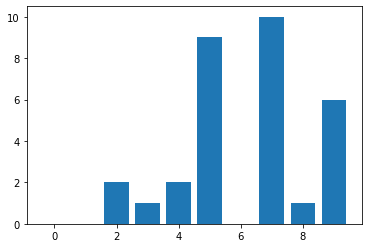

In [86]:
# For better visulation of the miss event we have built this bar graph so that we can compare all the miss event 
# including the base CPI (By comapring the length of bar we can analyze that which event is contributing how much
# to the CPI)

r=[cpi_of_c1,cpi_of_c2,cpi_of_c3,cpi_of_c4,cpi_of_c5,cpi_of_c6,cpi_of_c7,cpi_of_c8,cpi_of_c9,Base_cpi]
s = np.array([int((x - min(r))/(max(r) - min(r)) * 10) for x in r])

plt.bar(np.arange(len(s)), s)
plt.show()

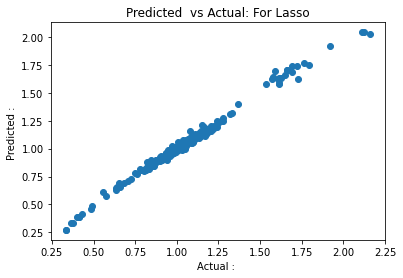

In [87]:
# we have plotted our prediction
# here y axis is predicted value and x axis is actual value 
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual : ")
plt.ylabel("Predicted : ")
plt.title("Predicted  vs Actual: For Lasso")
plt.show()

In [88]:
# Note:- Code below for here is just for checking not used in assignment report or anywhere else 
# All the code below from this point is for Linear regression we have just used this to check that what is the 
# difference we got between the Linear regression model and lasso model 


from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
# temp=regressor.fit(X_train, y_train)
temp=regressor_linear.fit(X_train, y_train)
y_pred_linear = regressor_linear.predict(X_test)


In [89]:
print('Linear Intercept term: ',temp.intercept_) # This gives us the intercept term
print('Linear Coefficients: \n',temp.coef_) 
# print(temp.coef_)


Linear Intercept term:  0.16414636641483038
Linear Coefficients: 
 [  95.47238887    7.85938539 1817.50377741   39.95206398   78.43129664
    4.39031337   16.0031008    43.53937082   81.7566537 ]


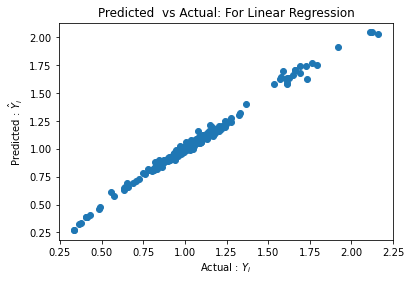

In [90]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_linear)
plt.xlabel("Actual : $Y_i$")
plt.ylabel("Predicted : $\hat{Y}_i$")
plt.title("Predicted  vs Actual: For Linear Regression")
plt.show()
# print(y_pred_linear)
# print(y_pred)